Step 1: Clone AIForMankind Wildfire Repo


In [ ]:
!git clone https://github.com/aiformankind/wildfire-smoke-detection-camera

Cloning into 'wildfire-smoke-detection-camera'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 4119 (delta 33), reused 14 (delta 3), pack-reused 4051
Receiving objects: 100% (4119/4119), 162.21 MiB | 33.48 MiB/s, done.
Resolving deltas: 100% (775/775), done.
Checking out files: 100% (4062/4062), done.


Step 2: Clone Tensorflow Models Repo

In [ ]:
%cd /content/
!git clone https://github.com/tensorflow/models.git 

/content
Cloning into 'models'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 38185 (delta 2), reused 5 (delta 0), pack-reused 38170
Receiving objects: 100% (38185/38185), 544.49 MiB | 29.36 MiB/s, done.
Resolving deltas: 100% (25588/25588), done.


Step 3: Change Directory and export PYTHONPATH

In [ ]:
%cd /content/models/research/
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim 

/content/models/research


Step 4: Install Tensorflow Version 1.14 and Compile all of the Protobuf files 

In [ ]:
%cd /content/models/research/
!pip install tensorflow==1.14
!protoc --python_out=. object_detection/protos/*.proto

/content/models/research
  Using cached https://files.pythonhosted.org/packages/de/f0/96fb2e0412ae9692dbf400e5b04432885f677ad6241c088ccc5fe7724d69/tensorflow-1.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


Step 5: Run setup.py from slim to install dependencies

In [ ]:
%cd /content/models/research/slim/
!python setup.py install

/content/models/research/slim
running install
running bdist_egg
running egg_info
creating slim.egg-info
writing slim.egg-info/PKG-INFO
writing dependency_links to slim.egg-info/dependency_links.txt
writing requirements to slim.egg-info/requires.txt
writing top-level names to slim.egg-info/top_level.txt
writing manifest file 'slim.egg-info/SOURCES.txt'
writing manifest file 'slim.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/nets
copying nets/inception.py -> build/lib/nets
copying nets/vgg.py -> build/lib/nets
copying nets/s3dg_test.py -> build/lib/nets
copying nets/cyclegan_test.py -> build/lib/nets
copying nets/inception_v4_test.py -> build/lib/nets
copying nets/nets_factory.py -> build/lib/nets
copying nets/inception_resnet_v2_test.py -> build/lib/nets
copying nets/mobilenet_v1_eval.py -> build/lib/nets
copying nets/mobilenet_v1.py -> build/lib/nets
copying nets/i

Step 6: Get a Model TarFile from TensorFlow Model Zoo

In [ ]:
%cd /content/
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

/content
--2020-07-07 21:13:25--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.111.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   164MB/s    in 0.9s    

2020-07-07 21:13:26 (164 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



Step 7: Extract all from TarFile


In [ ]:
import tarfile
tar = tarfile.open("faster_rcnn_inception_v2_coco_2018_01_28.tar.gz")
tar.extractall()
tar.close()

Install TF_SLIM and install dependencies from models/research. Export other PYTHONPATH too.

In [ ]:
!pip install tf_slim
%cd /content/models/research/
!python3 setup.py install
%cd object_detection
!set PYTHONPATH=/content/models
!set PYTHONPATH=/content/models/research
!set PYTHONPATH=/content/models/research/slim
!python builders/model_builder_test.py

/content/models/research
running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying object_detection/protos/losses_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/preprocessor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/train_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/string_int_label_map_pb2.py -> build/lib/object_detection/pro

Copy the Corresponding Config File for your model to /content/

In [ ]:
%cd /content/
!cp models/research/object_detection/samples/configs/faster_rcnn_inception_v2_coco.config /content/faster_rcnn_inception_v2_coco.config

/content


Examine the Config File


In [ ]:
!cat faster_rcnn_inception_v2_coco.config

# Faster R-CNN with Inception v2, configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.


model {
  faster_rcnn {
    num_classes: 90
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_inception_v2'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        truncate

Use sed to edit the contents of the file such as fine_tune_checkpoint, label_map_path, num_examples, train_record_path, and test_record_path

In [ ]:
!sed -i "s|PATH_TO_BE_CONFIGURED/|/content/wildfire-smoke-detection-camera/|g" faster_rcnn_inception_v2_coco.config
!sed -i "s|mscoco_label_map.pbtxt|input/annotations/label_map.pbtxt|g" faster_rcnn_inception_v2_coco.config
!sed -i "s|mscoco_val.record-?????-of-00010|input/val.record|g" faster_rcnn_inception_v2_coco.config
!sed -i "s|mscoco_train.record-?????-of-00100|input/train.record|g" faster_rcnn_inception_v2_coco.config
!sed -i "s|num_steps: 200000|num_steps: 200|g" faster_rcnn_inception_v2_coco.config
!sed -i "s|num_classes: 90|num_classes: 1|g" faster_rcnn_inception_v2_coco.config
!sed -i "s|/content/wildfire-smoke-detection-camera/model.ckpt|/content/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt|g" faster_rcnn_inception_v2_coco.config
!sed -i "s|num_examples: 8000|num_examples: 744|g" faster_rcnn_inception_v2_coco.config

Train the model

In [ ]:
%cd /content/
!python /content/models/research/object_detection/legacy/train.py --train_dir=/content/train/ --pipeline_config_path=/content/faster_rcnn_inception_v2_coco.config --alsologtostderr 

/content
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (typ

Export Inference Graph. If you face an error such as no module named tf_slim. Restart Runtime and use !pip install tf_slim

In [ ]:
%cd /content/
!python models/research/object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path /content/faster_rcnn_inception_v2_coco.config --trained_checkpoint_prefix /content/train/model.ckpt-0 --output_directory /content/inference_graph

/content
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (typ

Import all libraries for inference. If you face any no module found errors, try restarting runtime

In [ ]:
%cd /content/models/research/object_detection/
!pip install tf_slim
!python3 setup.py install
%cd /content/models/research/slim/
!python setup.py install
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image


# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

/content/models/research/object_detection
python3: can't open file 'setup.py': [Errno 2] No such file or directory
/content/models/research/slim
running install
running bdist_egg
running egg_info
writing slim.egg-info/PKG-INFO
writing dependency_links to slim.egg-info/dependency_links.txt
writing requirements to slim.egg-info/requires.txt
writing top-level names to slim.egg-info/top_level.txt
writing manifest file 'slim.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/nets
creating build/bdist.linux-x86_64/egg/nets/nasnet
copying build/lib/nets/nasnet/nasnet_utils_test.py -> build/bdist.linux-x86_64/egg/nets/nasnet
copying build/lib/nets/nasnet/__init__.py -> build/bdist.linux-x86_64/egg/nets/nasnet
copying build/lib/nets/nasnet/pnasnet_test.py -> build/bdist.linux-x86_64/egg/nets/nasnet
copying build/lib/nets/nasnet/README.md -> build/bdist.linu

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

From Object Detection Tutorial Notebook:


In [ ]:
path_to_frozen_ig = "/content/inference_graph/frozen_inference_graph.pb"
PATH_TO_LABELS = "/content/wildfire-smoke-detection-camera/input/annotations/label_map.pbtxt"
%matplotlib inline
from utils import label_map_util
from utils import visualization_utils as vis_util
import tensorflow.compat.v1 as tf

In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  graph_definition = tf.GraphDef()
  with tf.gfile.GFile(path_to_frozen_ig, "rb") as fid:
    serialized_graph = fid.read()
    graph_definition.ParseFromString(serialized_graph)
    tf.import_graph_def(graph_def=graph_definition, name="")

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': 'smoke'}}


In [ ]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
import os
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/wildfire-smoke-detection-camera/test/shapes'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

Poorly Trained Model as it is only trained for one step:)


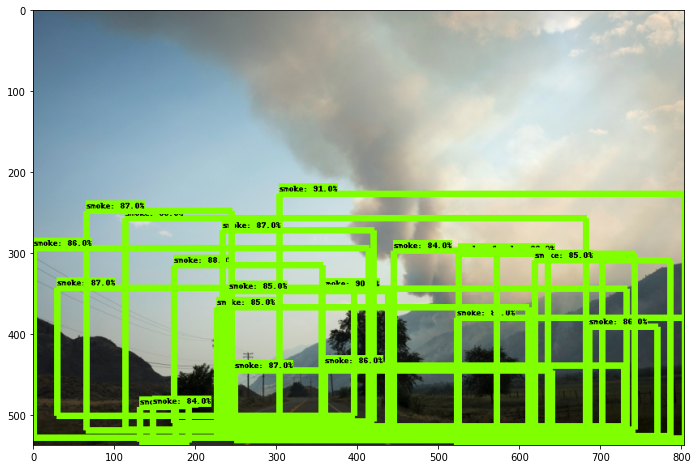

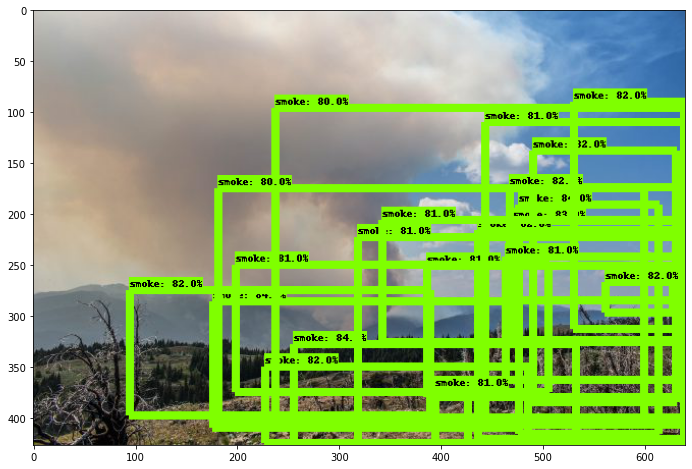

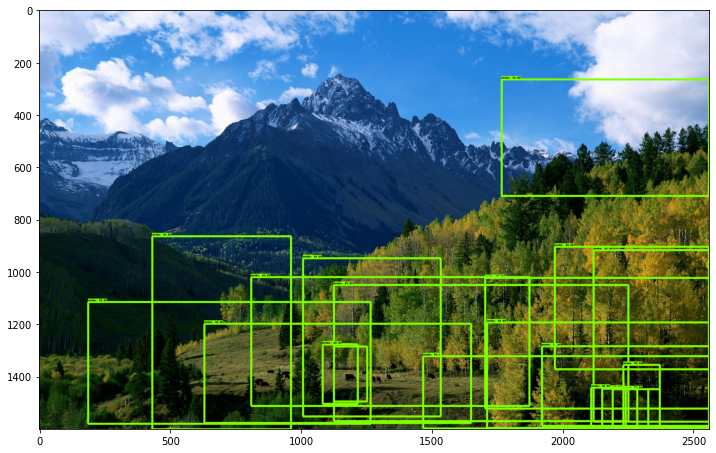

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)